# Carvana Price Predictor

### Questions to Explore
- What are the top 20 selling cars in the data set?
- When were most of the cars sold built?
- What does the distribution of mileage look like?
- Is there a relationship between the age of a car and its price?
- Is there a relationship between the mileage on a car and its price?
- Can we create a predictive model to estimate a car's price when given it's make, model, mileage and year built?
- How can we improve our predictive model?

### Summary
After cleaning the data, we began our analysis by looking at the different variables that may contribute to our a price predictor model. Starting with the name variable, we created a graph of the top 20 selling make and models. The graph showed us that the Toyota Carolla was the top selling car with 835 cars sold. We found that Nissan, Toyota, and Honda are among the most popular makes. Nissan had four models in the top 20 selling cars, while Toyota and Honda both had three models. Moving on, we presented a graph of car sales based on the year the car was built. Cars built in 2015 sold the most and appeared to be the center of the distribution of car sales based on year built. Overall, the data of the year the car was built seemed normal. Lastly, we graphed the distribution of mileage. The milaeage data also appeared normal and centered around 45,000 to 50,000 miles. 

Next, we explored the relationship of the car's age and the car's mileage to its price. Both age and mileage had similar relationships to price. As a car increased in age, its price declined with the most significant decline happening in the first few years of the car's life. An increase in mileage resulted in a decline in price. It makes sense that these variables would have similar effects. One would expect to see a car travel more miles over time. 

To build a price predictor model, we needed to decide which variables to use. While cleaning and exploring the data, we had added an age column to our dataframe so we could better show the relationship between age and price visually. The age column would be redundant with year built so we removed the age column. This left us with three variables to predict price. We had the name, year built and mileage. Year built and mileage were straight-forward as they were already numeric values. However, the challenge with this data set was the high number of categories in the name variable. As we explored the data, we learned that there were 416 unique make and models. This would be too many categories to one hot encode each unique make and model. We considered simplifying the name category to just the car make, but there were still 41 unique car makes. Instead, we decided to catorgize the name column by whether or not the car make was an economy brand or luxury brand. We manipulated our data so the model would accept three variables. The three variables would be year built, mileage, and luxury. 

Now that we defined the four variables to predict price, we tested three models to predict the car price. We examined linear regression, random forest regression and extreme gradient boosting. To evaluate how well each model predicted price, we focused on the mean absolute error and the R2 score. The random forest performed the best as evident by having the lowest mean absolute error and highest R2 score.

After selecting the random forest as the best model, we hypertuned the parameters to see if we could improve our evaluation scores. The hypertuning only slightly improved our scores. Our hypertuned random forest model had R2 score of 0.68. This means the model can explain about 68% of the variability of a car's price. 

While our model performs adequately, we could potentially improve it. The best way would be to further classify the make and models of each car. In addition to economy or luxury, we could group makes by sedans, SUVs, trucks and vans. We may consider further grouping based on the size of the cars. If we were looking to create a better model in the future with a new data set, we could consider collecting more data on each car sale such as engine type, number of seats, safety ratings and other classifiers. While adding more classifiers may help improve the ability of the model to predict car price, it will still be important to not add too many classifiers; otherwise, the we will run into the same issue we had initially of having to many categories. The more categories, the slower the model will be. Ultimately, we will have to decide the minimum acceptable score for the model to determine how many car variables we should include.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from prettytable import PrettyTable

In [2]:
# Import data set and explore data
car_data = pd.read_csv('Data/carvana.csv')

car_data

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [4]:
car_data.describe()

,Year,Miles,Price
count,2.200000e+04,22000.000000,22000.000000
mean,1.946648e+05,54445.697318,20707.285136
std,1.630370e+06,25685.933926,6535.580304
min,2.009000e+03,53.000000,10990.000000
25%,2.014000e+03,35512.000000,16590.000000
50%,2.017000e+03,51890.000000,19590.000000
75%,2.020000e+03,73191.000000,22990.000000
max,2.022350e+07,120167.000000,102990.000000


In [5]:
car_data.isnull().sum()

Name     0
Year     0
Miles    0
Price    0
dtype: int64

There are no null values in our data set.

In [6]:
car_data.nunique()

Name      416
Year      211
Miles    8836
Price     866
dtype: int64

There are 416 unique make and model combinations in our data set.

In [7]:
# Present list of all the makes and models
car_data['Name'].unique()

array([' Chevrolet Trax', ' GMC Terrain', ' Jeep Wrangler',
       ' Jeep Renegade', ' BMW X', ' Buick Encore', ' Jeep Compass',
       ' Jeep Patriot', ' Chrysler Sebring', ' Subaru Legacy',
       ' Subaru XV Crosstrek', ' Mitsubishi Eclipse Cross',
       ' Toyota Corolla', ' Nissan Pathfinder', ' Lincoln MKC',
       ' Lexus ES', ' Dodge Grand Caravan Passenger', ' Ford Escape',
       ' Mitsubishi Mirage G', ' Toyota C-HR', ' Toyota Yaris',
       ' MAZDA CX-', ' Nissan Rogue Sport', ' Volkswagen Atlas',
       ' MAZDA MAZDA', ' Nissan Sentra', ' Honda Civic', ' Nissan Rogue',
       ' Toyota Corolla iM', ' Subaru Forester', ' Volkswagen Jetta',
       ' FIAT ', ' Honda Accord', ' Hyundai Sonata', ' GMC Acadia',
       ' Kia Optima', ' Hyundai Veloster', ' Hyundai Elantra',
       ' FIAT  Spider', ' Honda Odyssey', ' Volkswagen Tiguan',
       ' Acura RDX', ' Jeep Grand Cherokee', ' Chrysler Voyager',
       ' Hyundai Accent', ' Honda CR-V', ' INFINITI QX',
       ' Chevrolet Trav

The make and model data appears to be clean.

In [8]:
car_data['Year'].unique()

array([    2018,     2020,     2012,     2019,    20173,     2016,
           2017,     2015,     2014,     2010,    20194,    20165,
           2013,    20133,     2011,  2013500,  2017124,     2021,
           2022,   201650,    20163,    20215,    20113,    20152,
       20141500,   202130,    20204,    20153,  2014500,  2016500,
          20103,    20156,  2017500,   201040,  2013300,  2015200,
        2013150,    20125,    20185,    20166,    20146,    20213,
         202180,   201860,    20184,    20203,    20143,    20144,
         201550,   202050,   202150,    20199,    20219,    20205,
         201730,   202060,  2018500,  2015500,  2010370,   201750,
          20174,   201360,   200970,    20193,    20145,    20164,
          20123,    20176,  2016200,   201560,  2015900,    20161,
        2016900,    20154,    20182,    20157,  2019500,    20183,
          20122,    20129,    20114,  2020150, 20211500,    20135,
          20196,  2014200, 20201500,    20195,    20134,    20

We can see several year inputs have extra digits. It seems the first 4 digits are entered correctly so we will need to clean the 'Year' column.

In [9]:
# convert year column to str so we can pull first 4 digits
clean_y = car_data['Year'].astype('str')

clean_y                   

0         2018
1         2020
2         2012
3         2019
4        20173
         ...  
21995     2014
21996     2016
21997     2013
21998     2020
21999     2012
Name: Year, Length: 22000, dtype: object

In [10]:
# Create empyty list for Year and enter first 4 digits of year column for each entry
Year = []
for y in clean_y:
    Year.append(y[:4])

In [11]:
# remove original Year column
car_data.drop(['Year'], inplace=True, axis=1)

In [12]:
# add in clean year column
car_data.insert(loc=1, column='Year', value=Year)

In [13]:
car_data['Year'].unique()

array(['2018', '2020', '2012', '2019', '2017', '2016', '2015', '2014',
       '2010', '2013', '2011', '2021', '2022', '2009', '2023'],
      dtype=object)

Year column is now clean.

In [14]:
# convert year column back to int
car_data['Year'] = car_data['Year'].apply(pd.to_numeric)

In [15]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [16]:
# any extreme values in miles?
print(car_data['Miles'].sort_values().head())
print(car_data['Miles'].sort_values().tail())

4415     53
4473     53
5496     81
6209    230
4822    347
Name: Miles, dtype: int64
660     113710
799     113710
472     116121
406     116121
2540    120167
Name: Miles, dtype: int64


The 'Miles' data appears to be reasonable as there are no negative values or unrealisitc positive values.

In [17]:
# any extreme values in price?
print(car_data['Price'].sort_values().head())
print(car_data['Price'].sort_values().tail())

11143    10990
6401     11590
6402     11590
1795     11990
3406     11990
Name: Price, dtype: int64
5644     89990
6091     92990
5986     94590
3800     98590
5367    102990
Name: Price, dtype: int64


The 'Price' data appears to be reasonable.

In [18]:
# add age column
car_data['Age'] = 2023 - car_data['Year']

In [19]:
car_data

,Name,Year,Miles,Price,Age
0,Chevrolet Trax,2018,41946,16990,5
1,GMC Terrain,2020,45328,23990,3
2,Jeep Wrangler,2012,81068,21590,11
3,Jeep Renegade,2019,35372,21590,4
4,BMW X,2017,68992,22990,6
...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,9
21996,Dodge Charger,2016,62616,23990,7
21997,Ford Taurus,2013,50345,16990,10
21998,Toyota Corolla Hatchback,2020,27945,23990,3


# Visualizations

Text(0, 0.5, 'Count')

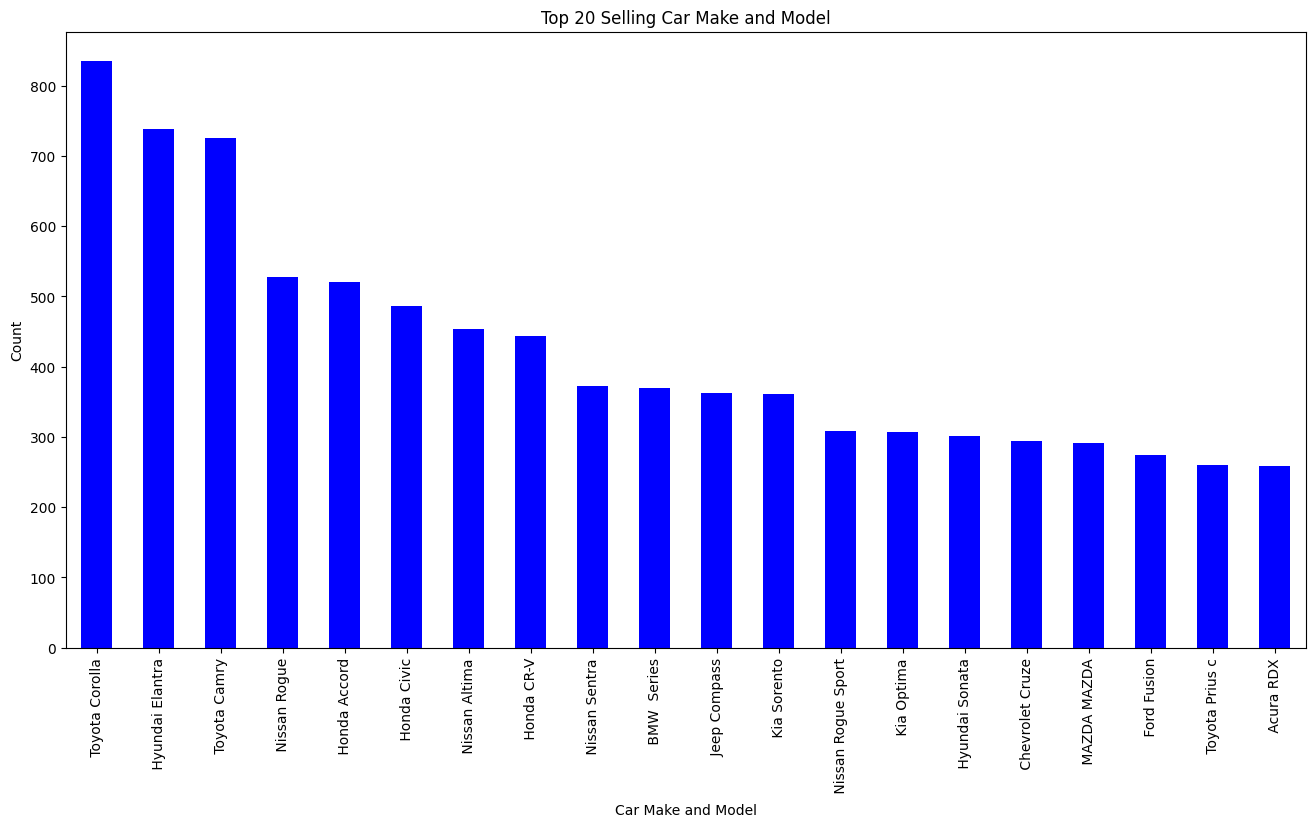

In [20]:
# What are the top 20 selling car make and models?
plt.figure(figsize=(16, 8))

car_data['Name'].value_counts().head(20).plot(kind='bar', color='blue')
plt.title('Top 20 Selling Car Make and Model')
plt.xlabel('Car Make and Model')
plt.ylabel('Count')

In [21]:
# most sold make and model
car_max = car_data['Name'].value_counts().idxmax()
num_car_max = car_data['Name'].value_counts().max()

# least sold make and model
car_min = car_data['Name'].value_counts().idxmin()
num_car_min = car_data['Name'].value_counts().min()

print("The", car_max, "is the most sold car in the data set with", num_car_max, "cars sold. The", car_min, "is the least sold car with only", num_car_min, "car sold.")

The  Toyota Corolla is the most sold car in the data set with 835 cars sold. The  Volkswagen New Beetle is the least sold car with only 1 car sold.


Text(0, 0.5, 'Count')

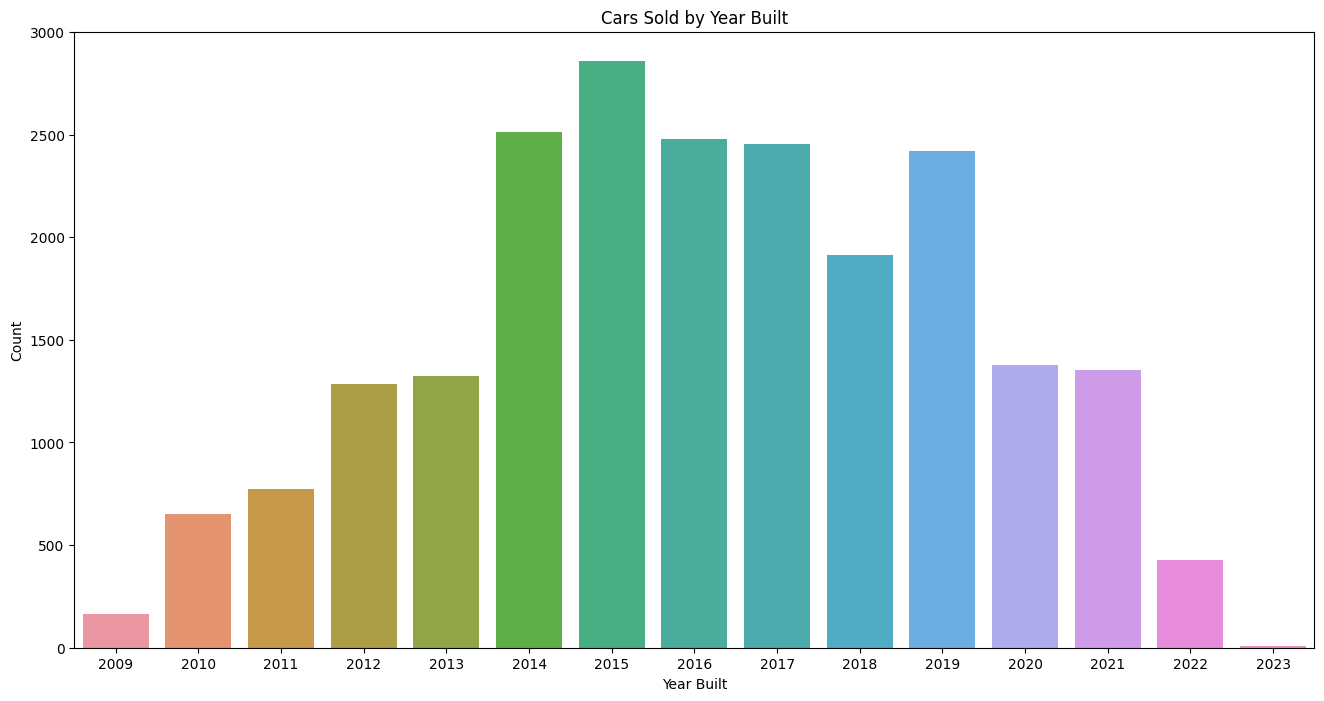

In [22]:
# Show the number of cars sold by year built
plt.figure(figsize=(16, 8))

sns.countplot(x='Year', data=car_data)
plt.title('Cars Sold by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

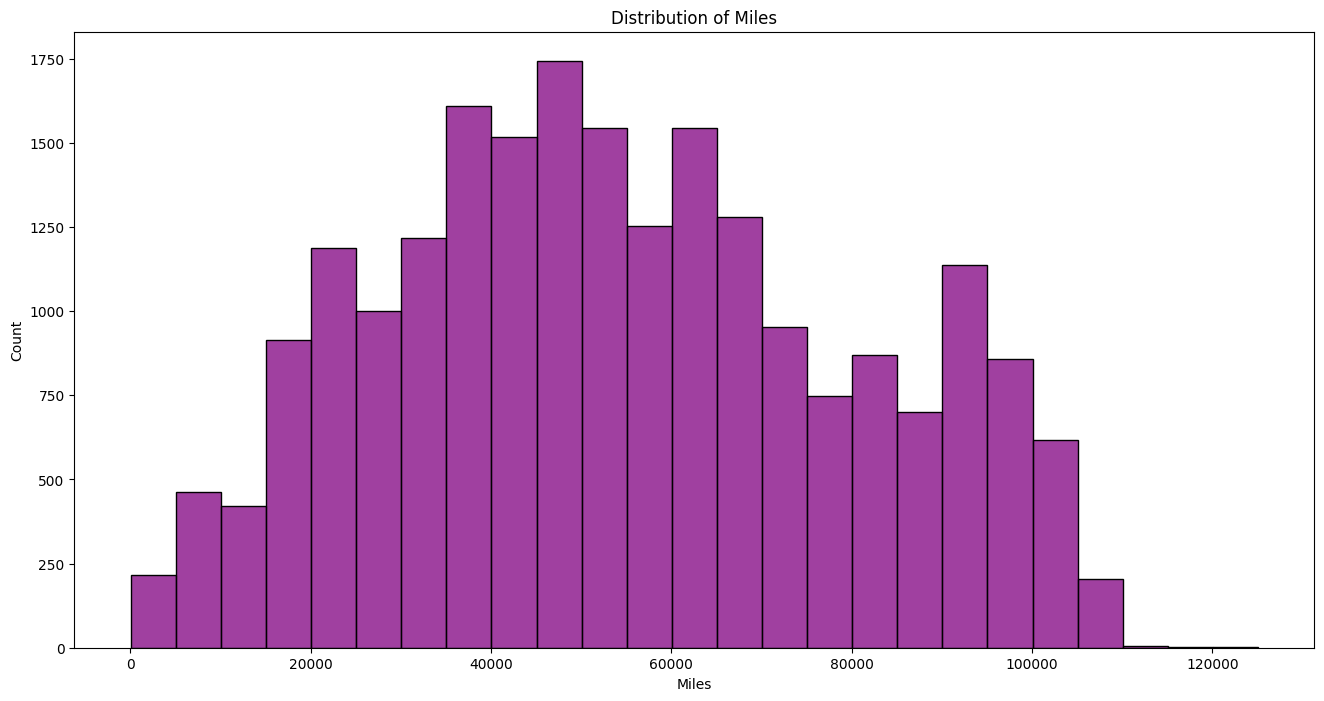

In [23]:
# What is the distribution of car miles?
plt.figure(figsize=(16, 8))

sns.histplot(x='Miles', data=car_data, binwidth=5000, color='purple')
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Count')

The mileage distribution shows us the majority of cars sold have between 35,000 and 70,000 miles. The distribution also appears to be normal.

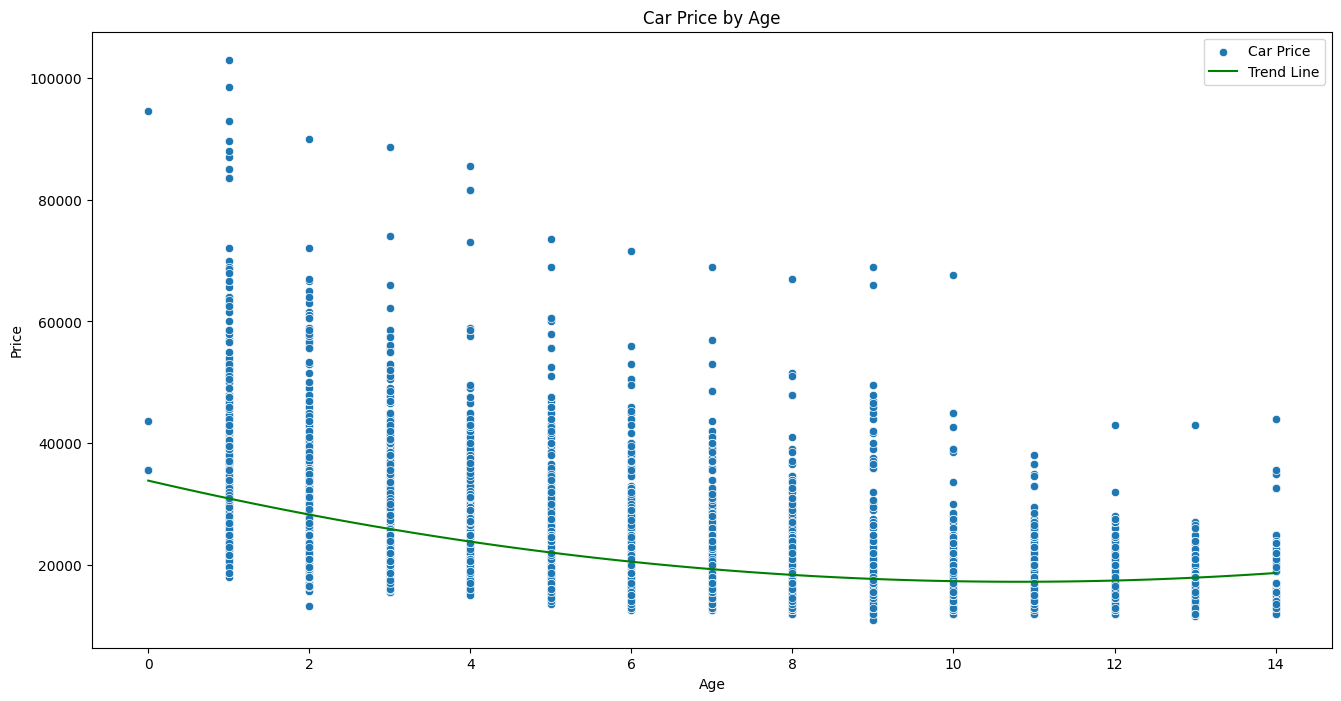

In [24]:
# Show relationship between 'Age' and 'Price' with Trend Line
plt.figure(figsize=(16, 8))
sns.scatterplot(data=car_data, x='Age', y='Price')
plt.title('Car Price by Age')
plt.xlabel('Age')
plt.ylabel('Price')

# Trend line
x = car_data['Age']
y = car_data['Price']
a, b, c = np.polyfit(x, y, deg=2)
x = np.linspace(0, x.max(), num=100)
plt.plot(x, a*(x**2)+b*x+c, color='green', label='Trend Line')

plt.legend(['Car Price', 'Trend Line'])

The scatter plot with trend line above shows us that as age increases, the price declines.

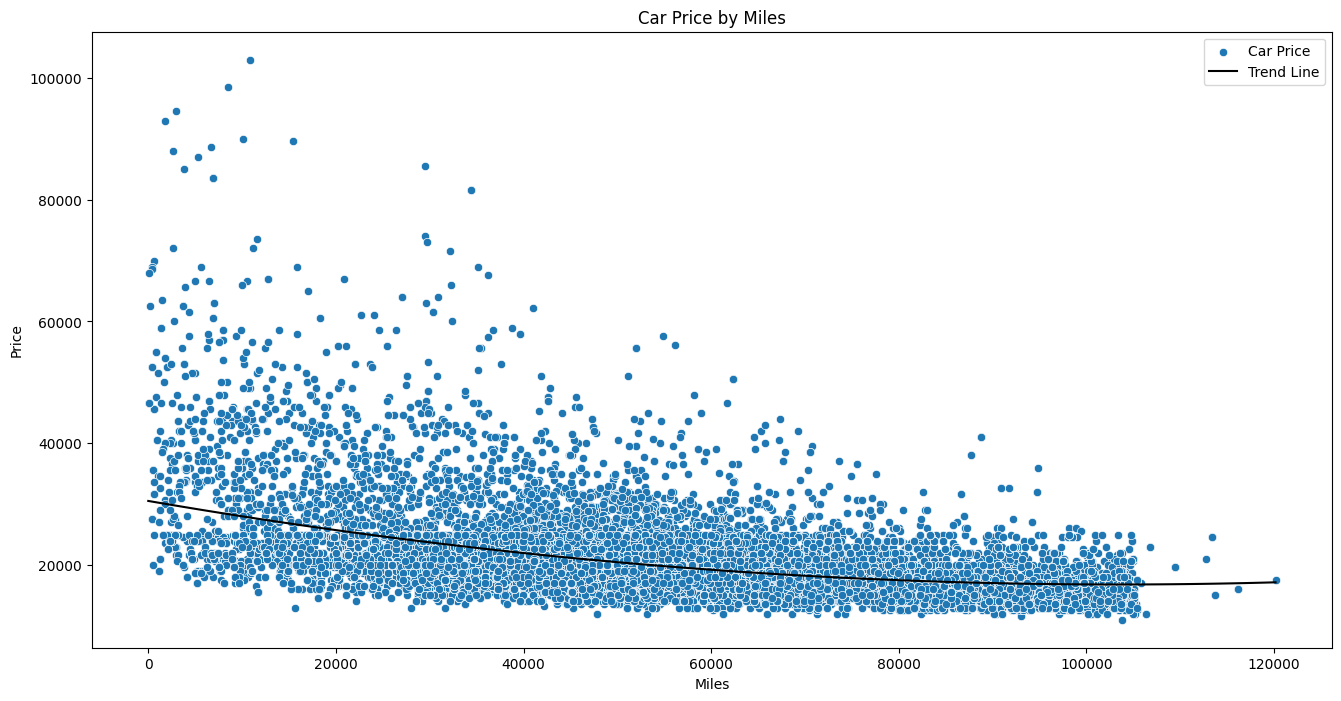

In [25]:
# Show relationship between 'Miles' and 'Price' with Trend Line
plt.figure(figsize=(16, 8))
sns.scatterplot(data=car_data, x='Miles', y='Price')
plt.title('Car Price by Miles')
plt.xlabel('Miles')
plt.ylabel('Price')

# Trend line
x = car_data['Miles']
y = car_data['Price']
a, b, c = np.polyfit(x, y, deg=2)
x = np.linspace(0, x.max(), num=100)
plt.plot(x, a*(x**2)+b*x+c, color='black', label='Trend Line')

plt.legend(['Car Price', 'Trend Line'])

Similar to age, as miles increase, the car price decreases.

# Predictive Model

Can we build a model that will predict the car price when given the car make, model, year built and mileage?

In [26]:
# create new dataframe that removes 'Age' since it is redundant with 'Year'
car_data_pred = car_data.copy()
car_data_pred = car_data_pred.drop('Age', axis=1)
car_data_pred2 = car_data_pred.copy()

car_data_pred

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,2017,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


The challenge with this data set is dealing with the high cardinality in the 'Name' column as there are 416 unique make and models. The best way to approach a field with high cardinality is to see if we can better group the categories. We'll start by splitting the 'Name' column into 'Make' and 'Model' columns.

In [27]:
# split 'Name' column into a list to isolate 'Make' and 'Model'
car_data_pred[['Space', 'Make', 'Model']] = car_data_pred['Name'].str.split(' ', n=2, expand=True)
car_data_pred

,Name,Year,Miles,Price,Space,Make,Model
0,Chevrolet Trax,2018,41946,16990,,Chevrolet,Trax
1,GMC Terrain,2020,45328,23990,,GMC,Terrain
2,Jeep Wrangler,2012,81068,21590,,Jeep,Wrangler
3,Jeep Renegade,2019,35372,21590,,Jeep,Renegade
4,BMW X,2017,68992,22990,,BMW,X
...,...,...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,,Honda,Accord
21996,Dodge Charger,2016,62616,23990,,Dodge,Charger
21997,Ford Taurus,2013,50345,16990,,Ford,Taurus
21998,Toyota Corolla Hatchback,2020,27945,23990,,Toyota,Corolla Hatchback


In [28]:
# Let's see how many unique car 'Make' we have to see if we can group by car 'Make'
car_make = pd.DataFrame(car_data_pred['Make'].unique())
car_make.columns=['Make']
car_make

,Make
0,Chevrolet
1,GMC
2,Jeep
3,BMW
4,Buick
5,Chrysler
6,Subaru
7,Mitsubishi
8,Toyota
9,Nissan


There are 41 unique car 'Make'. This is still too many categories for our analysis. To build our model, we will categorize the cars based on the class of the vehicle's 'Make'. We will breakdown the 'Car_Brand_Class' as either 'Luxury' or 'Economy'

In [29]:
# sort car 'Make' so we can create a list of the 'Luxury' car brands
car_make = car_make.sort_values('Make')
car_make

,Make
20,Acura
24,Alfa
23,Audi
3,BMW
4,Buick
26,Cadillac
0,Chevrolet
5,Chrysler
12,Dodge
17,FIAT


In [30]:
# create list of 'Luxury' car brands
luxury = ['Acura', 'Alfa', 'Audi', 'BMW', 'Cadillac', 'Genesis', 'INFINITI', 'Jaguar', 'Land', 'Lexus', 'Lincoln', 'Maserati', 'Mercedes-Benz', 'Porsche', 'Tesla', 'Volvo'] 

In [31]:
# add column to dataframe that identifies if the 'Car_Brand_Class' is 'Luxury' or 'Economy'
car_data_pred['Car_Brand_Class'] = car_data_pred['Make'].apply(lambda x: 'Luxury' if x in luxury else 'Economy')
car_data_pred.head()

,Name,Year,Miles,Price,Space,Make,Model,Car_Brand_Class
0,Chevrolet Trax,2018,41946,16990,,Chevrolet,Trax,Economy
1,GMC Terrain,2020,45328,23990,,GMC,Terrain,Economy
2,Jeep Wrangler,2012,81068,21590,,Jeep,Wrangler,Economy
3,Jeep Renegade,2019,35372,21590,,Jeep,Renegade,Economy
4,BMW X,2017,68992,22990,,BMW,X,Luxury


In [32]:
# since we will only use the 'Car_Brand_Class' for our model, we can remove the 'Name', 'Space', 'Make' and 'Model' columns
car_data_pred = car_data_pred.drop(columns=['Name', 'Space', 'Make', 'Model'])
car_data_pred.head()

,Year,Miles,Price,Car_Brand_Class
0,2018,41946,16990,Economy
1,2020,45328,23990,Economy
2,2012,81068,21590,Economy
3,2019,35372,21590,Economy
4,2017,68992,22990,Luxury


array([[<AxesSubplot: title={'center': 'Year'}>,
        <AxesSubplot: title={'center': 'Miles'}>],
       [<AxesSubplot: title={'center': 'Price'}>, <AxesSubplot: >]],
      dtype=object)

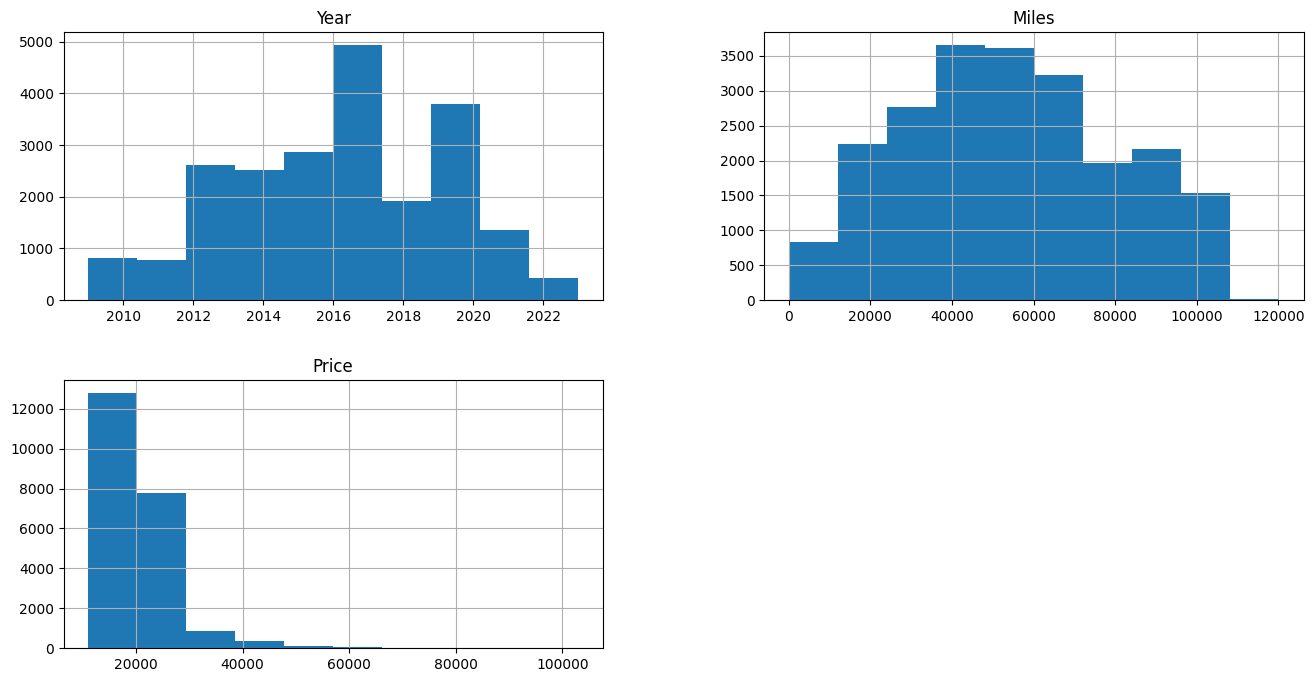

In [33]:
car_data_pred.hist(figsize=(16, 8))

The 'Year' and 'Miles' data have relatively normal distributions. 

In [34]:
# convert 'Car_Brand_Class' categories into numerical values for the model
car_data_pred = car_data_pred.join(pd.get_dummies(car_data_pred.Car_Brand_Class)).drop(['Car_Brand_Class'], axis=1)

# Remove 'Economy' column because redunant with 'Luxury'
car_data_pred = car_data_pred.drop(['Economy'], axis=1)
car_data_pred

,Year,Miles,Price,Luxury
0,2018,41946,16990,0
1,2020,45328,23990,0
2,2012,81068,21590,0
3,2019,35372,21590,0
4,2017,68992,22990,1
...,...,...,...,...
21995,2014,98085,17590,0
21996,2016,62616,23990,0
21997,2013,50345,16990,0
21998,2020,27945,23990,0


Now our car_data_pred dataframe is ready for the model.

<AxesSubplot: >

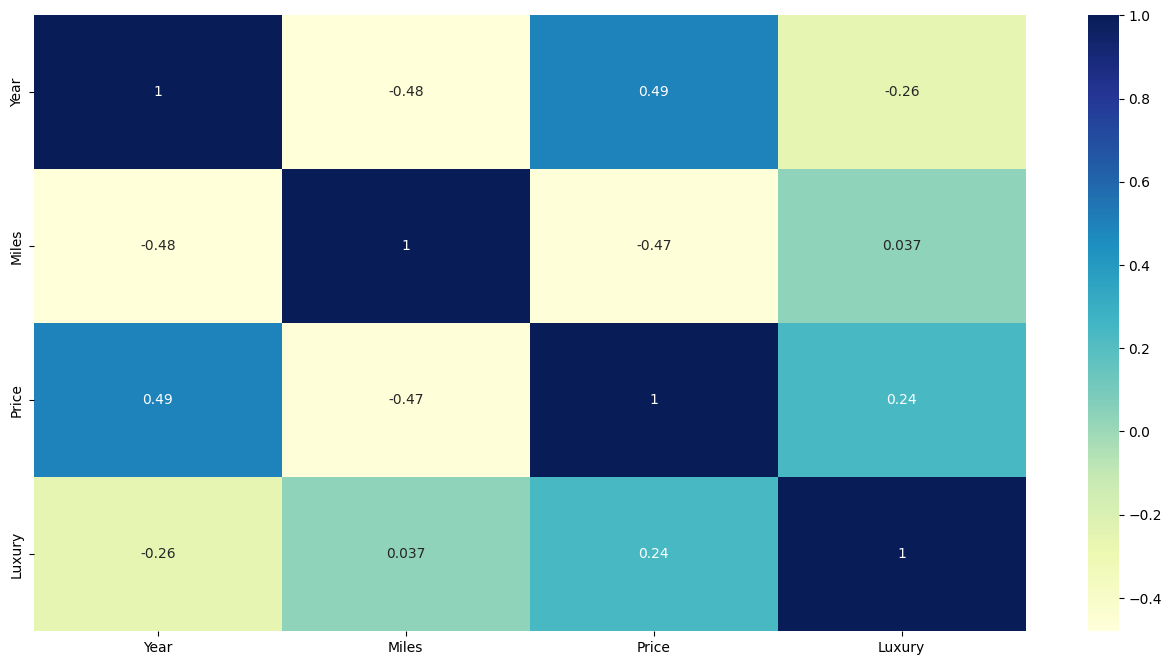

In [35]:
# Create heatmap of the correlation between the variables
plt.figure(figsize=(16, 8))
sns.heatmap(car_data_pred.corr(), annot=True, cmap='YlGnBu')

The correlation heatmap above shows 'Miles' has a moderate negative correlation to 'Price', while 'Year' has a moderate positive correlation to 'Price'. This means as mileage increases prices decreases, and the newer the car the higher the price. The luxury class has a small positive correlation to 'Price'.

In [36]:
# assign columns we will use to predict price to X and 'Price' to y
X = car_data_pred.drop(['Price'], axis=1)
y = car_data_pred['Price']

In [37]:
# make sure shape of X and Y are compatible
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)

Shape of X is: (22000, 3)
Shape of y is: (22000,)


In [38]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# make sure split data is compatible
print("Shape of X_train is:", X_train.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (17600, 3)
Shape of y_train is: (17600,)
Shape of X_test is: (4400, 3)
Shape of y_test is: (4400,)


In [40]:
# tested applying scaler to data but lowered r2_score so removed
#scaler = StandardScaler()

In [41]:
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

### Linear Regression Model

In [42]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [43]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of the linear regression model is:", linreg_mae)
print("R2 of the linear regression model is:", linreg_r2)

MAE of the linear regression model is: 3128.653103446145
R2 of the linear regression model is: 0.4307340939850499


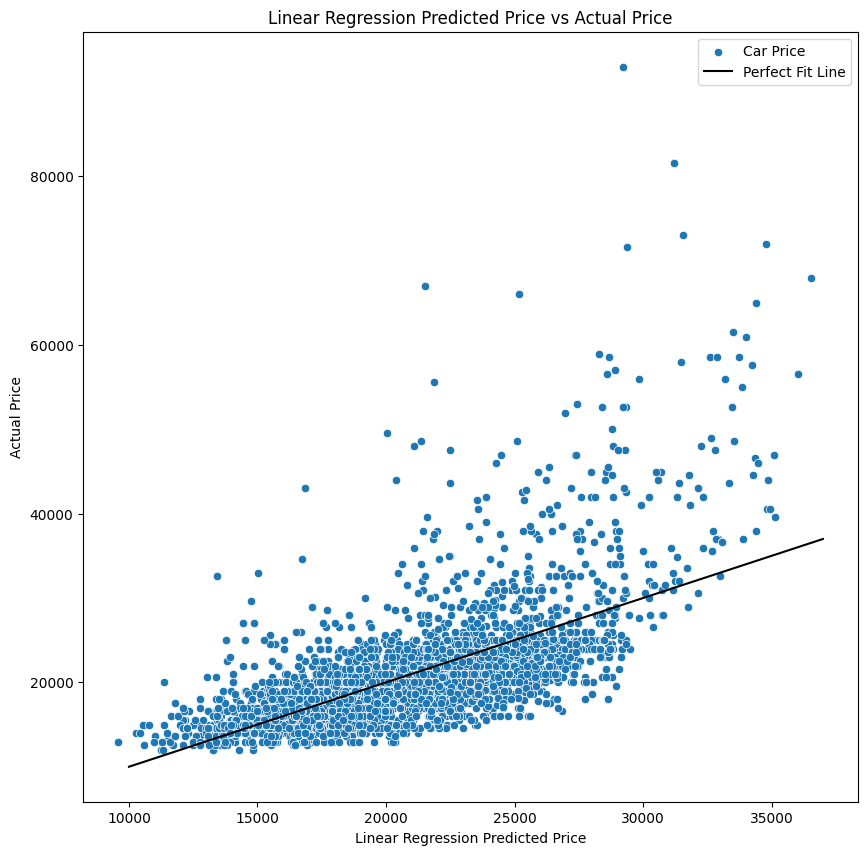

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=linreg_pred, y=y_test)
x = np.linspace(10000, 37000, num=100)
plt.plot(x, x, color='black')
plt.title('Linear Regression Predicted Price vs Actual Price')
plt.xlabel('Linear Regression Predicted Price')
plt.ylabel('Actual Price')
plt.legend(['Car Price', 'Perfect Fit Line'])

By looking at the mean absolute error and the r2 score, we can see the linear regression model does not do a very good job predicting price. The black line in the graph above represents if the linear regression model perfectly predicted the acutal car prices. We can the model seems to underestimate price for most part and gets worse as price increases.

### Random Forest Regression Model

In [45]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [46]:
forest_mae = mean_absolute_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)
print("MAE of the random forest regression model is:", forest_mae)
print("R2 of the random forest regression model is:", forest_r2)

MAE of the random forest regression model is: 1657.8223462631895
R2 of the random forest regression model is: 0.6760876941803368


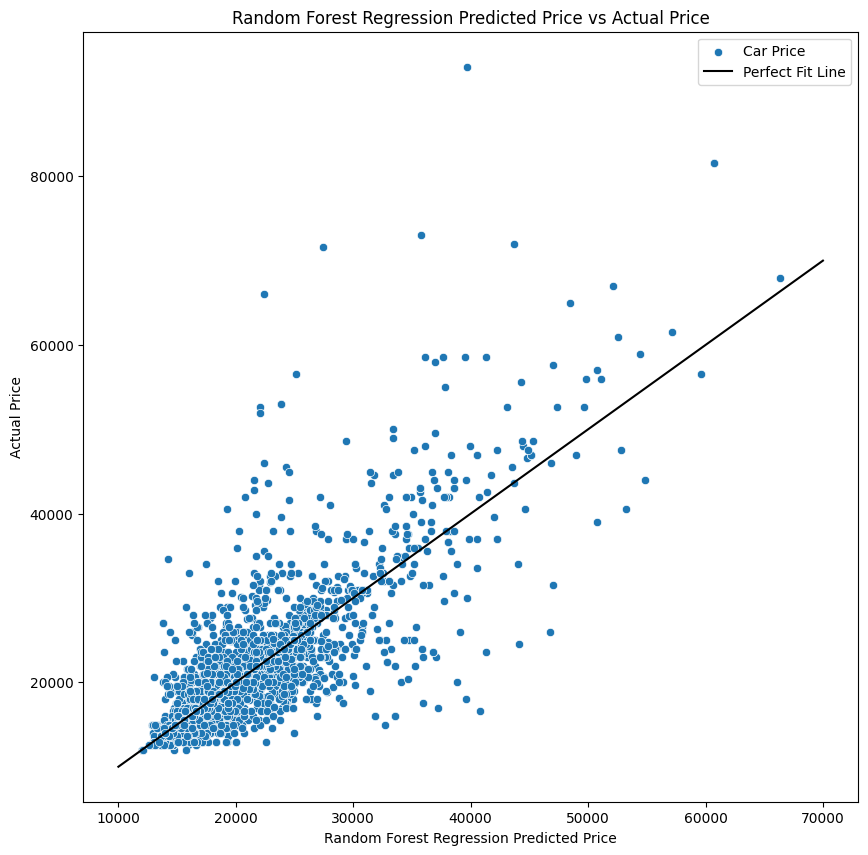

In [47]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=forest_pred, y=y_test)
x = np.linspace(10000, 70000, num=100)
plt.plot(x, x, color='black')
plt.title('Random Forest Regression Predicted Price vs Actual Price')
plt.xlabel('Random Forest Regression Predicted Price')
plt.ylabel('Actual Price')
plt.legend(['Car Price', 'Perfect Fit Line'])

The random forest model does a much better job predicting price than the linear regression model. The mean absolute value socre is significantly less and the r2 score is higher compared to the linear regression model. The lower mean absolute error means across all the data points there is a smaller difference between the actual price and the predicted price. The higher r2 score means a higher percentage of the y variable or 'Price' can be explained by the x variables, which are year built, mileage, and car brand class. 

Furthermore, looking at the graph above, the black line does a better jobs going through the center of all the data points compared to the linear regression model. Still, let's see if we can create a better model with the extreme gradient boosting approach.

### XGBoost Regression Model

In [48]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [49]:
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("MAE of the random forest regression model is:", xgb_mae)
print("R2 of the random forest regression model is:", xgb_r2)

MAE of the random forest regression model is: 2247.9765385298297
R2 of the random forest regression model is: 0.6376162799139116


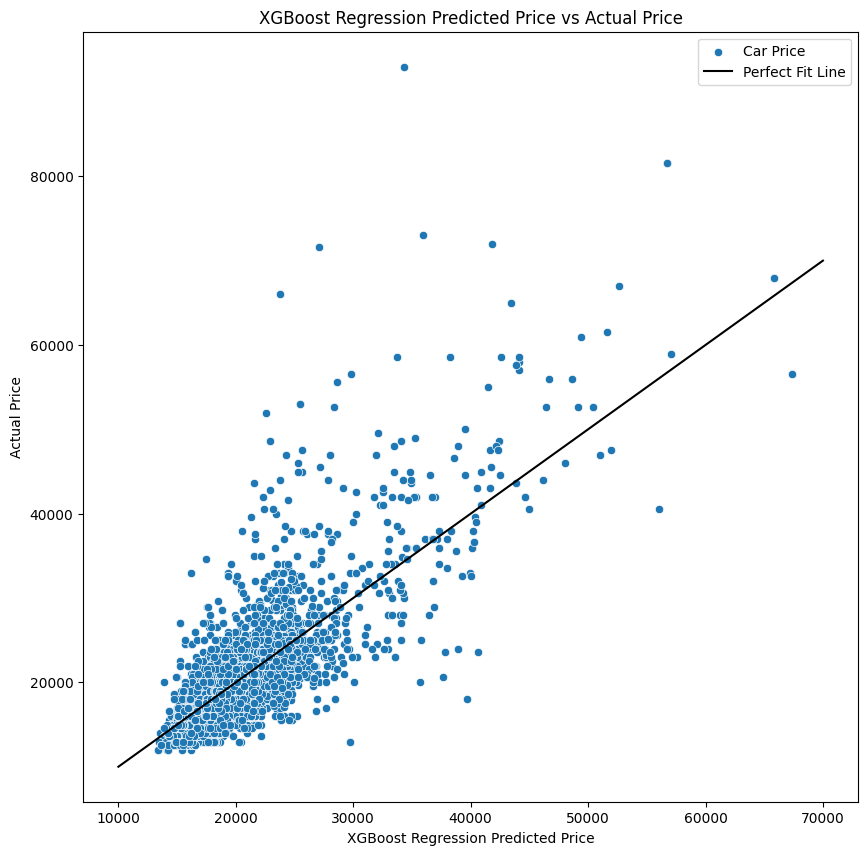

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=xgb_pred, y=y_test)
x = np.linspace(10000, 70000, num=100)
plt.plot(x, x, color='black')
plt.title('XGBoost Regression Predicted Price vs Actual Price')
plt.xlabel('XGBoost Regression Predicted Price')
plt.ylabel('Actual Price')
plt.legend(['Car Price', 'Perfect Fit Line'])

Compared to the random forest model, the xgb model performs slightly worse. The graph above does not make it as obvious that the xgb model performed worse. However, we can tell it performed worse based on the higher mean absolute error and lower r2 scores.

### Summary of Regression Models

In [51]:
table = PrettyTable([" ", "Linear Regression", "Random Forest", "XGBoost"])
table.add_row(["MAE", linreg_mae.round(), forest_mae.round(), xgb_mae.round()])
table.add_row(["R2 Score", linreg_r2.round(decimals=5), forest_r2.round(decimals=5), xgb_r2.round(decimals=5)])

print(table)

+----------+-------------------+---------------+---------+
|          | Linear Regression | Random Forest | XGBoost |
+----------+-------------------+---------------+---------+
|   MAE    |       3129.0      |     1658.0    |  2248.0 |
| R2 Score |      0.43073      |    0.67609    | 0.63762 |
+----------+-------------------+---------------+---------+


The table above shows us that the random forest regression model performed the best. This is evident as it has the lowest mean absolute error and the highest R2 score. A lower mean absolute error means there was less of a difference between the actual price and the predicted price. The higher r2 score tells us a higher percentage of car prices were predicted by the x variables, which we defined as the year built, mileage, and car brand class.

### Hypertuning Parameters - Random Forest

After determining the random forest model best predicted car price based on the variables we defined, let's see if we can tune the model to get better price predictions.

In [52]:
# show current parameters
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
# parameters to test
params = [{
    "n_estimators": [100, 250, 300],
    "max_features": [10, 12, 14],
}]  

In [54]:
grid_search = GridSearchCV(forest, params, cv=3, scoring="r2", return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 12, 14],
                          'n_estimators': [100, 250, 300]}],
             return_train_score=True, scoring='r2')

In [55]:
best_forest = grid_search.best_estimator_

In [56]:
best_forest

RandomForestRegressor(max_features=10, n_estimators=300)

In [57]:
best_forest.score(X_test, y_test)

0.6798691534531995

We focused on adjusting the n_estimators and the max_features for the model. Hypertuning the parameters using the grid search helped our r2 score very slightly. Therefore, we will use the best forest model for our example below.

### Predicting Car Price

In [58]:
# Let's see what are model predicts will be the price of this Chevrolet Trax
car_data.head(1)

,Name,Year,Miles,Price,Age
0,Chevrolet Trax,2018,41946,16990,5


In [59]:
car_data_pred.columns

Index(['Year', 'Miles', 'Price', 'Luxury'], dtype='object')

In [60]:
# Create a single entry dataframe that matches the characteristics of the Chevrolet Trax above
data = {'Year': 2018, 'Miles': 41946, 'Luxury': 0}
index = [0]
test_model = pd.DataFrame(data, index)
test_model

,Year,Miles,Luxury
0,2018,41946,0


In [61]:
# Plug the variables into the best_forest model
test_pred = best_forest.predict(test_model)
print("The best forest model predicts that an economy car built in 2018 with 41,946 miles will have a price of", '${:,.0f}'.format(test_pred[0]))
print("This is about $1,000 higher compared to the actual price of the 2018 Chevrolet Trax with 41,946 miles which sold for", '${:,.0f}'.format(car_data['Price'].iloc[0]))

The best forest model predicts that an economy car built in 2018 with 41,946 miles will have a price of $18,103
This is about $1,000 higher compared to the actual price of the 2018 Chevrolet Trax with 41,946 miles which sold for $16,990
